# Time Series Analysis - Introduction
![](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2020/07/TimeSeriesTrade.png?fit=576%2C384&ssl=1)

## Airline Analysis of Passengers
- **Reference dataset** : https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download

In [6]:
# Step 0 : Libary import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


### Step 1: Data Loading

In [7]:
#use pandas dataframe
df = pd.read_csv('/content/AirPassengers (1).csv')

In [8]:
# information
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Step 2 : Data Cleaning

In [10]:
# null values
df.isnull().sum()

,0
Month,0
#Passengers,0


In [11]:
# duplications
df.duplicated().sum()

np.int64(0)

### Step 3: EDA

In [12]:
# Distribution
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [13]:
# object type of data
df.describe(include='object')

,Month
count,144
unique,144
top,1949-01
freq,1


In [14]:
# Change the month column into datetime object
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [15]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Figure size 1500x700 with 0 Axes>

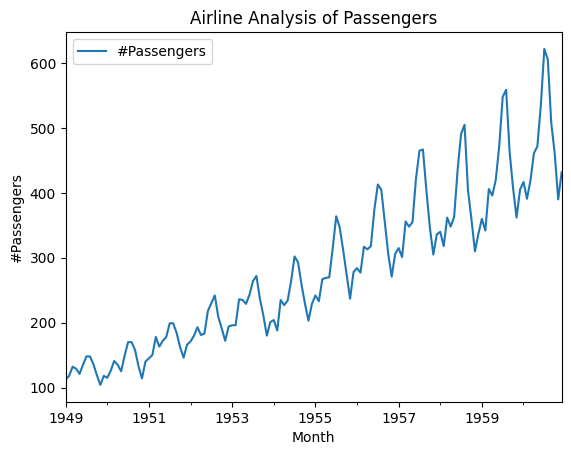

In [16]:
# line plot
plt.figure(figsize=(15, 7))
df.plot(x='Month', y='#Passengers', kind='line',title='Monthly Air Passenger Traffic')

plt.ylabel('#Passengers')
plt.title('Airline Analysis of Passengers')
plt.show()

### Feature Engineering - Decomoposition of Time Series

In [17]:
# Make Month column index
df.set_index('Month', inplace=True)


In [18]:
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


**Y = l + t + s + n**
- LEVEL + TREND + SEASONALITY + NOISE

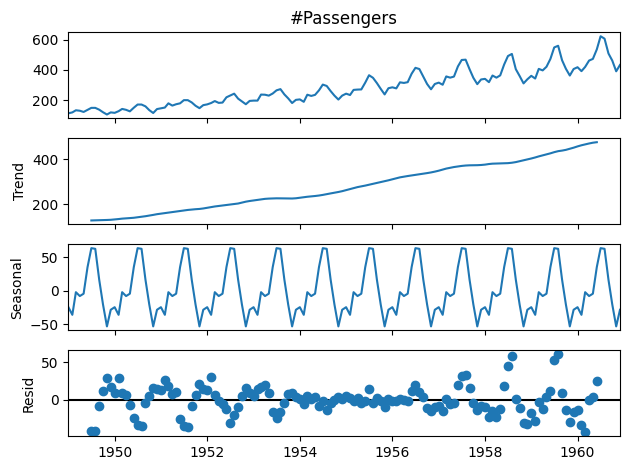

In [19]:
decomposition = seasonal_decompose(df['#Passengers'], model='additive',period = 12)
decomposition.plot()
plt.show()

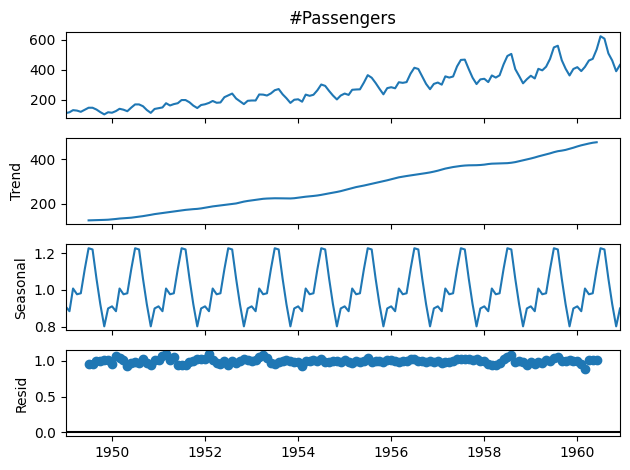

In [20]:
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative',period = 12)
decomposition.plot()
plt.show()

**Access the composnents**

In [29]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#show components in the dataset
pd.concat([trend,seasonal,residual,df['#Passengers']],axis=1).tail(20)


,trend,seasonal,resid,#Passengers
Month,,,,
1959-05-01,420.500000,-4.506313,4.006313,420
1959-06-01,425.500000,35.402778,11.097222,472
1959-07-01,430.708333,63.830808,53.460859,548
1959-08-01,435.125000,62.823232,61.051768,559
1959-09-01,437.708333,16.520202,8.771465,463
1959-10-01,440.958333,-20.642677,-13.315657,407
1959-11-01,445.833333,-53.593434,-30.239899,362
1959-12-01,450.625000,-28.619949,-17.005051,405
1960-01-01,456.333333,-24.748737,-14.584596,417


# Class 2 - Statistical Methods
### 1. Descriptive Analysis - Decomposition

<Figure size 1500x700 with 0 Axes>

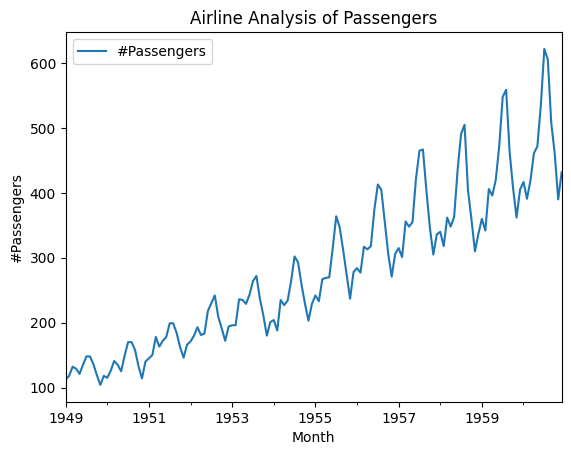

In [23]:
# 1.1 Time Series Plotting
plt.figure(figsize=(15, 7))
df.plot(title='Monthly Air Passenger Traffic')

plt.ylabel('#Passengers')
plt.title('Airline Analysis of Passengers')
plt.show()

In [24]:
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [30]:
# 1.2 Rolling Stats (Moving Averages)

df['Rolling_Mean'] = df['#Passengers'].rolling(window=12).mean()
df['Rolling_Std'] = df['#Passengers'].rolling(window=12).std()

df.tail(20)

,#Passengers,Rolling_Mean,Rolling_Std
Month,,,
1959-05-01,420,397.083333,60.008270
1959-06-01,472,400.166667,63.009138
1959-07-01,548,404.916667,71.987951
1959-08-01,559,409.416667,80.049369
1959-09-01,463,414.333333,81.485451
1959-10-01,407,418.333333,79.680422
1959-11-01,362,422.666667,74.498729
1959-12-01,405,428.333333,69.830097
1960-01-01,417,433.083333,66.624399


<Figure size 1500x700 with 0 Axes>

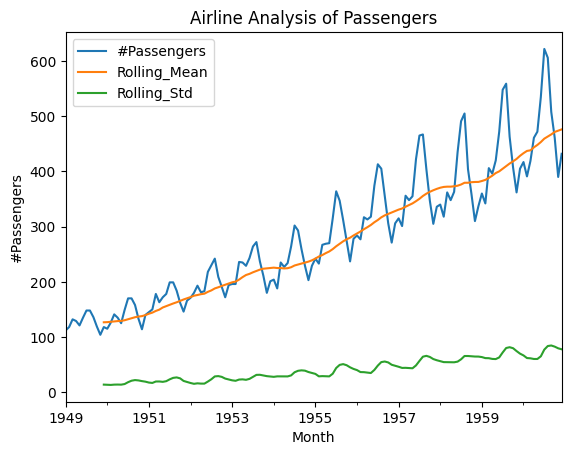

In [27]:
# Plot
plt.figure(figsize=(15, 7))
df[['#Passengers', 'Rolling_Mean','Rolling_Std']].plot(title='Rolling Mean & Std Dev')

plt.ylabel('#Passengers')
plt.title('Airline Analysis of Passengers')
plt.show()

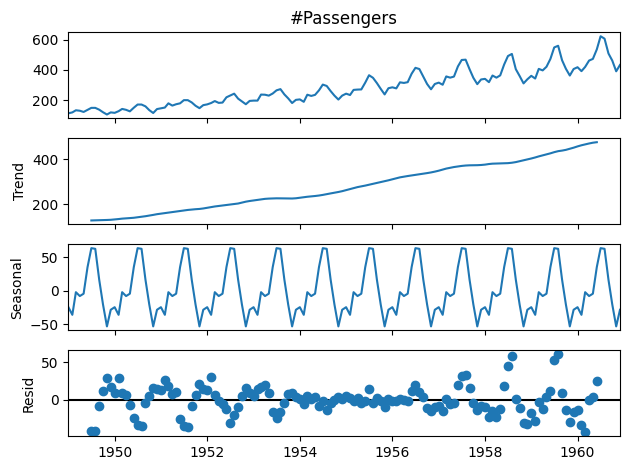

In [28]:
# 1.3. Decompositon of Time Series
decomposition = seasonal_decompose(df['#Passengers'], model='additive',period = 12)
decomposition.plot()
plt.show()

### 2. Stationarity Tests

- Objective : Most forecating models requires data to be stationary
- Constant over time : Makes predicatbility more reliable

### ADF Test Hypothesis:

**Null Hypothesis (H0):** The time series is non-stationary. This means it has a unit root, and its statistical properties change over time.

**Alternative Hypothesis (H1):** The time series is stationary. This means it does not have a unit root, and its statistical properties remain constant over time.

**Interpretation:**

- If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the time series is stationary.
- If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

**In simpler terms:**

We want the ADF test to reject the null hypothesis, indicating that our data is stationary and suitable for forecasting models.


In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['#Passengers'])


print('ADF Statistic:', result[0])


ADF Statistic: 0.8153688792060498


In [32]:
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

p-value: 0.991880243437641
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [33]:
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0). The time series is non-stationary.")

Fail to reject the null hypothesis (H0). The time series is non-stationary.


**Differecing to make Stationary**

In [35]:
df_diff = df['#Passengers'].diff().dropna()
adf_result = adfuller(df_diff)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [36]:
df_diff

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


### 3. Autocorrelation & Dependency
- Correlation of time series with its own past values.

### 3.1 Autocorrelation Function (ACF) - Key Points

* **Definition:** Measures correlation between a time series and its lagged values.
* **Purpose:** Identifies temporal dependencies, seasonality, and data patterns.
* **Lag:** Time difference between two data points.
* **Correlation:** Quantifies the linear relationship between a time series and its lags.
* **ACF Plot (Autocorrelogram):** Visual representation of correlations at different lags.
    * Significant correlations: Bars exceeding confidence intervals.
    * Positive ACF: Same-direction movement with past values.
    * Negative ACF: Opposite-direction movement with past values.
    * Gradual decay: Strong temporal dependence.
    * Sharp drop: Limited dependence within a specific time window.
* **Applications:**
    * Seasonality identification.
    * Model selection guidance (e.g., ARIMA).
    * Forecasting accuracy improvement.

**In short, ACF unveils the relationship between past and present values in a time series, aiding analysis and prediction.**

<Figure size 2000x500 with 0 Axes>

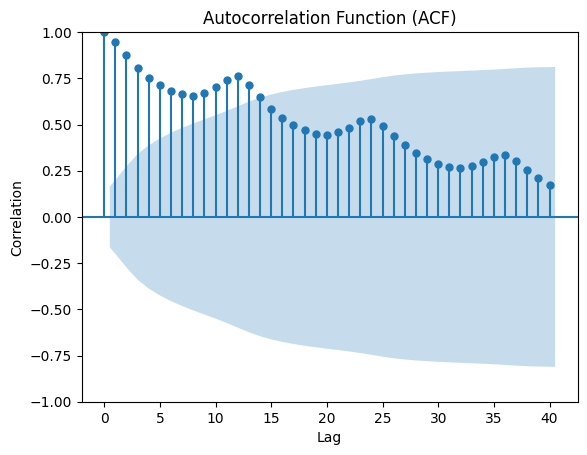

In [42]:
# code ACF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20, 5))
plot_acf(df['#Passengers'], lags = 40)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

**Impresions :**

1. Strong ACF at lag 1+
2. Trend or Seasonality
3. Non-Stationary

### 3.2 Partial Autocorrelation Function (PACF) - Key Points

* **Definition:** Measures the correlation between a time series and its lagged values, **controlling for the influence of intermediate lags.**
* **Purpose:** Isolates the direct relationship between a time series and its lags, removing indirect effects.
* **Lag:** Time difference between two data points.
* **Correlation:** Quantifies the linear relationship between a time series and its lags, after accounting for intermediate lags.
* **PACF Plot:** Visual representation of partial correlations at different lags.
    * Significant correlations: Bars exceeding confidence intervals.
    * Positive PACF: Same-direction movement with past values, independent of intermediate lags.
    * Negative PACF: Opposite-direction movement with past values, independent of intermediate lags.
    * Sharp drop: Limited direct dependence within a specific time window.
* **Applications:**
    * Model order selection for ARIMA models (identifying the "p" parameter).
    * Understanding the direct impact of past values on the current value.
    * Distinguishing between autoregressive (AR) and moving average (MA) processes.

**In short, PACF reveals the direct relationship between a time series and its lagged values, providing insights into the underlying data structure and supporting model selection.**

<Figure size 2000x500 with 0 Axes>

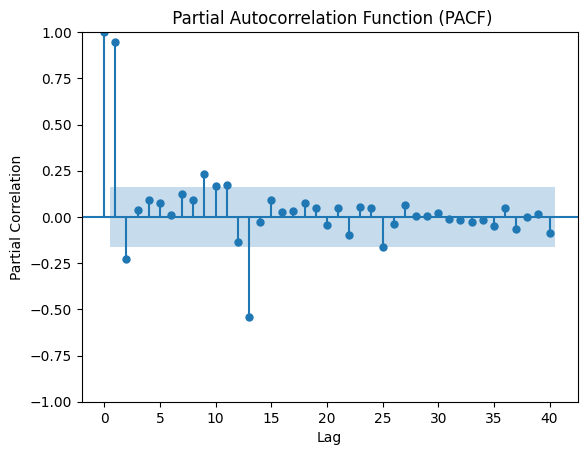

In [44]:
# code PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20, 5))
plot_pacf(df['#Passengers'], lags = 40)
plt.xlabel('Lag')
plt.ylabel('Partial Correlation')
plt.title(' Partial Autocorrelation Function (PACF)')
plt.show()